# 5. Entscheidungsbäume

In diesem Notebook wollen wir Entscheidungsbäume als neues ML-Modell betrachten.

Hinweis: Dieses Notebook folgt im großen Teilen dieser [Quelle](https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1).

### Iris Daten laden

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

FEATURE_NAMES = ['Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

Beim "Iris Flower Dataset" geht es darum drei unterschiedliche Arten von Schwertlilien anhand von vier Features zu unterscheiden. Weitere Informationen zu diesem bekannten Datensatz finden sich auf [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [2]:
X.head()

,Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Wir trainieren nun einen einfachen Entscheidungsbaum, welcher die Entropie als Splitting-Kriterium verwendet.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

Den gelernten Baum können wir nun einfach visualisieren und die gelernten Entscheidungsregeln mit anzeigen.

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [6]:
! dot -Tpng tree.dot -o tree.png

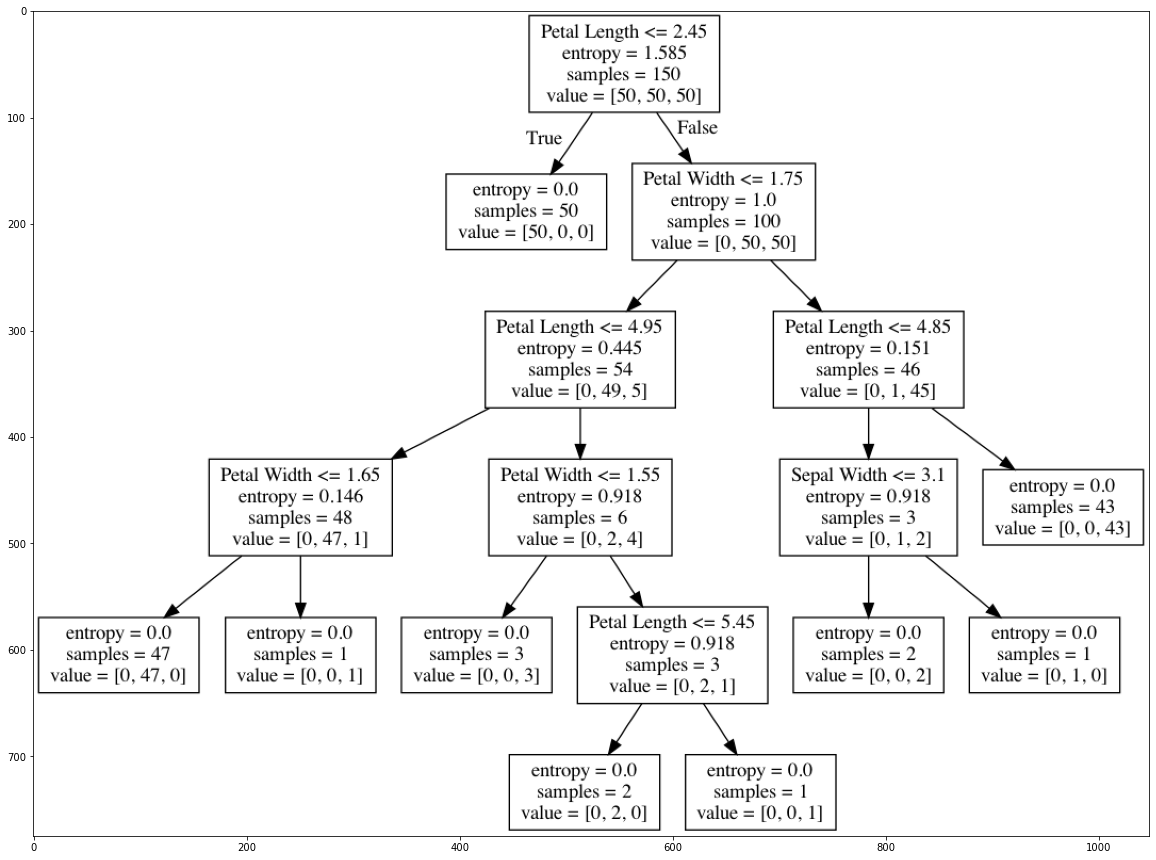

In [7]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

Wir sehen, dass alle Blätter dieses Baums "pure" sind, d.h. sie enthalten nur noch Datenpunkte einer Klasse. Trainieren wir den Baum mit einer maximalen Tiefe, ist dies nicht mehr der Fall:

In [11]:
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_2.fit(X,y)
export_graphviz(model_2, 'tree2.dot', feature_names = FEATURE_NAMES)

In [12]:
! dot -Tpng tree2.dot -o tree2.png

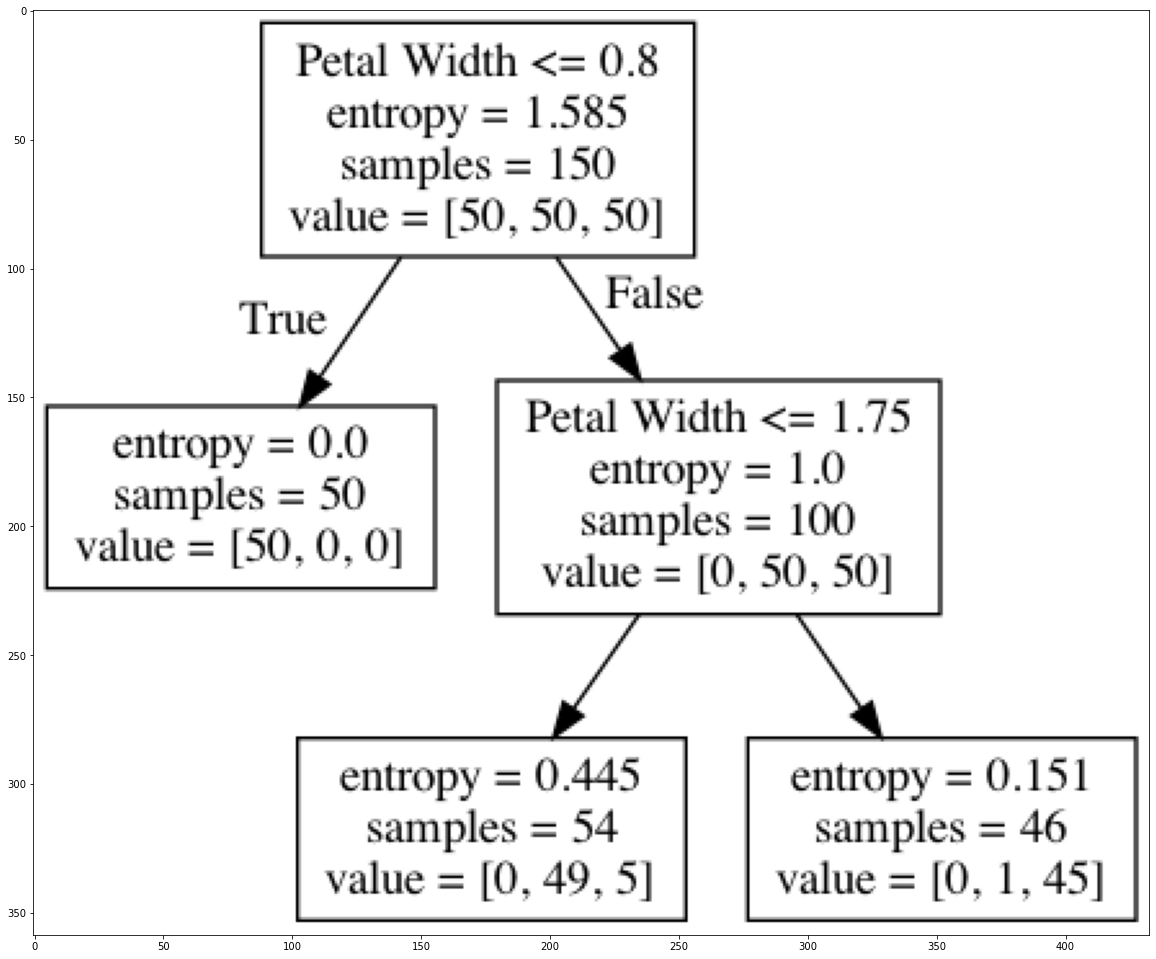

In [13]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree2.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)